In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
!sudo pip install cairo

In [2]:
import cairo

In [7]:
num_imgs = 1
img_size = 16
min_object_size = 4
max_object_size = 8
num_objects = 2

In [69]:
bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size, 4), dtype=np.uint8)  # format: BGRA
shapes = np.zeros((num_imgs, num_objects), dtype=int)
num_shapes = 3
shape_labels = ['rectangle', 'circle', 'triangle']
colors = np.zeros((num_imgs, num_objects), dtype=int)
num_colors = 3
color_labels = ['r', 'g', 'b']
print imgs.shape
print colors.shape

(1, 16, 16, 4)
(1, 2)


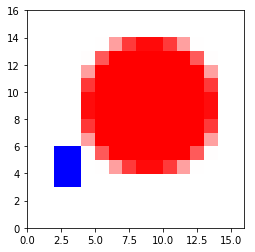

In [70]:
surface = cairo.ImageSurface.create_for_data(imgs[0], cairo.FORMAT_ARGB32, img_size, img_size)
cr = cairo.Context(surface)

# Fill background white.
cr.set_source_rgb(1, 1, 1)
cr.paint()
cr.rectangle(2, 3, 2, 3)
cr.set_source_rgb(0,0,1)
cr.fill()
cr.arc(9, 9, 5, 0, 2*np.pi)
cr.set_source_rgb(1,0,0)
cr.fill()
img = imgs[..., 2::-1] # Convert to Rgb 
#print imgs[0]
plt.imshow(imgs[0], interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
plt.imshow(img[0], interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])

In [42]:
max_offset = 0.3
print np.random.rand(3)
print max_offset * 2. * (np.random.rand(3) - 0.5)
r_offset, g_offset, b_offset = max_offset * 2. * (np.random.rand(3) - 0.5)
print r_offset, g_offset, b_offset
a,b=[2,3]
print a

[ 0.38961919  0.09102042  0.46133972]
[-0.06612103  0.26157783 -0.11836813]
-0.123160738351 -0.207674754739 0.0945269060962
2


In [71]:
num_imgs = 5

img_size = 32
min_object_size = 4
max_object_size = 16
num_objects = 2

bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size, 4), dtype=np.uint8)  # format: BGRA
shapes = np.zeros((num_imgs, num_objects), dtype=int)
num_shapes = 3
shape_labels = ['rectangle', 'circle', 'triangle']
colors = np.zeros((num_imgs, num_objects), dtype=int)
num_colors = 3
color_labels = ['r', 'g', 'b']

for i_img in range(num_imgs):
    surface = cairo.ImageSurface.create_for_data(imgs[i_img], cairo.FORMAT_ARGB32, img_size, img_size)
    cr = cairo.Context(surface)

    # Fill background white.
    cr.set_source_rgb(1, 1, 1)
    cr.paint()
    
    # TODO: Try no overlap here.
    # Draw random shapes.
    for i_object in range(num_objects):
        shape = np.random.randint(num_shapes)
        shapes[i_img, i_object] = shape
        if shape == 0:  # rectangle
            w, h = np.random.randint(min_object_size, max_object_size, size=2)
            x = np.random.randint(0, img_size - w)
            y = np.random.randint(0, img_size - h)
            bboxes[i_img, i_object] = [x, y, w, h]
            cr.rectangle(x, y, w, h)            
        elif shape == 1:  # circle   
            r = 0.5 * np.random.randint(min_object_size, max_object_size)
            x = np.random.randint(r, img_size - r)
            y = np.random.randint(r, img_size - r)
            bboxes[i_img, i_object] = [x - r, y - r, 2 * r, 2 * r]
            cr.arc(x, y, r, 0, 2*np.pi)
        elif shape == 2:  # triangle
            w, h = np.random.randint(min_object_size, max_object_size, size=2)
            x = np.random.randint(0, img_size - w)
            y = np.random.randint(0, img_size - h)
            bboxes[i_img, i_object] = [x, y, w, h]
            cr.move_to(x, y)
            cr.line_to(x+w, y)
            cr.line_to(x+w, y+h)
            cr.line_to(x, y)
            cr.close_path()
        
        # TODO: Introduce some variation to the colors by adding a small random offset to the rgb values.
        color = np.random.randint(num_colors)
        colors[i_img, i_object] = color
        max_offset = 0.3
        r_offset, g_offset, b_offset = max_offset * 2. * (np.random.rand(3) - 0.5)
        if color == 0:
            cr.set_source_rgb(1-max_offset+r_offset, 0+g_offset, 0+b_offset)
        elif color == 1:
            cr.set_source_rgb(0+r_offset, 1-max_offset+g_offset, 0+b_offset)
        elif color == 2:
            cr.set_source_rgb(0+r_offset, 0-max_offset+g_offset, 1+b_offset)
        cr.fill()
        
imgs = imgs[..., 2::-1]  # is BGRA, convert to RGB

# surface.write_to_png('imgs/{}.png'.format(i_img))
imgs.shape, bboxes.shape, shapes.shape, colors.shape


((5, 32, 32, 3), (5, 2, 4), (5, 2), (5, 2))

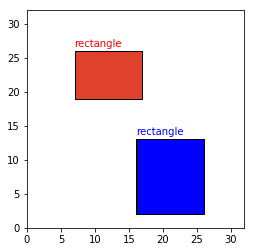

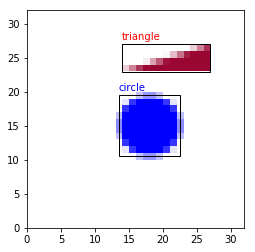

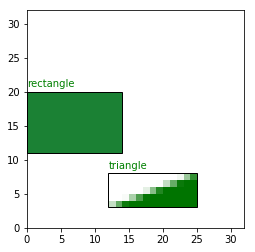

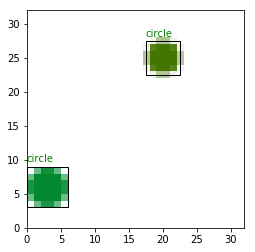

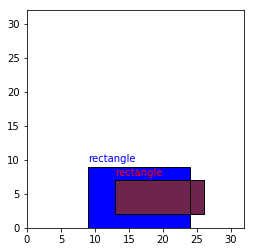

In [74]:
for i in range(5):
    plt.imshow(imgs[i], interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
    for bbox, shape, color in zip(bboxes[i], shapes[i], colors[i]):
        plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='k', fc='none'))
        plt.annotate(shape_labels[shape], (bbox[0], bbox[1] + bbox[3] + 0.7), color=color_labels[color], clip_on=False)
    plt.show()

In [83]:
#provide what color the object in an image are
colors_onehot = np.zeros((num_imgs, num_objects, num_colors))
print colors_onehot.shape
#print colors_onehot
for i_img in range(num_imgs):
    for i_object in range(num_objects):
        colors_onehot[i_img, i_object, colors[i_img, i_object]] = 1
print colors_onehot[0]
print colors_onehot[1]
print colors_onehot[2]
print colors_onehot[3]



(5, 2, 3)
[[ 1.  0.  0.]
 [ 0.  0.  1.]]
[[ 0.  0.  1.]
 [ 1.  0.  0.]]
[[ 0.  1.  0.]
 [ 0.  1.  0.]]
[[ 0.  1.  0.]
 [ 0.  1.  0.]]


In [84]:
# provide which object is of which shape in an image
shapes_onehot = np.zeros((num_imgs, num_objects, num_shapes))
print shapes_onehot.shape
for i_img in range(num_imgs):
    for i_object in range(num_objects):
        shapes_onehot[i_img, i_object, shapes[i_img, i_object]] = 1
for i in range(5):
    print shapes_onehot[i]

(5, 2, 3)
[[ 1.  0.  0.]
 [ 1.  0.  0.]]
[[ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.  0.  0.]
 [ 0.  0.  1.]]
[[ 0.  1.  0.]
 [ 0.  1.  0.]]
[[ 1.  0.  0.]
 [ 1.  0.  0.]]


In [89]:
#print bboxes /img_size
y = np.concatenate([bboxes / img_size, shapes_onehot, colors_onehot], axis=-1).reshape(num_imgs, -1)
print y.shape
print y

(5, 20)
[[ 0.21875   0.59375   0.3125    0.21875   1.        0.        0.        1.
   0.        0.        0.5       0.0625    0.3125    0.34375   1.        0.
   0.        0.        0.        1.      ]
 [ 0.421875  0.328125  0.28125   0.28125   0.        1.        0.        0.
   0.        1.        0.4375    0.71875   0.40625   0.125     0.        0.
   1.        1.        0.        0.      ]
 [ 0.        0.34375   0.4375    0.28125   1.        0.        0.        0.
   1.        0.        0.375     0.09375   0.40625   0.15625   0.        0.
   1.        0.        1.        0.      ]
 [ 0.546875  0.703125  0.15625   0.15625   0.        1.        0.        0.
   1.        0.        0.        0.09375   0.1875    0.1875    0.        1.
   0.        0.        1.        0.      ]
 [ 0.28125   0.        0.46875   0.28125   1.        0.        0.        0.
   0.        1.        0.40625   0.0625    0.40625   0.15625   1.        0.
   0.        1.        0.        0.      ]]


In [90]:
print np.all(np.argmax(colors_onehot, axis=-1) == colors)

True
